In [5]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from matplotlib import pyplot as plt
from analyze_price_data import future_price_function
from commodity_pricing_model import price_contract
from credit_risk_analysis import expected_loss
from bucket_fico_scores import bucket_fico_scores

### 1. Investigate & Analyze Price Data

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

- Download the monthly natural gas price data.
- Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
- Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
- Your code should take a date as input and return a price estimate.

Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

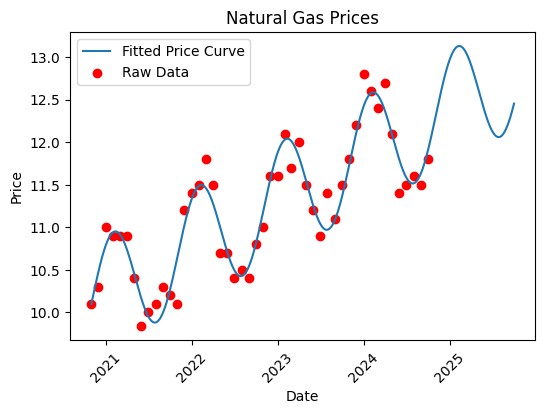

In [2]:
df1 = pd.read_csv('./data/nat_gas.csv', parse_dates=['Dates'])
prices = df1['Prices'].values
dates = df1['Dates'].values

continuous_dates, fit_prices = future_price_function(date(2020,10,31), date(2025,9,30))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(continuous_dates, fit_prices, label='Fitted Price Curve')
ax.scatter(dates, prices, c='r', label='Raw Data')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()

### 2. Price a Commodity Storage Contract

You should write a function that is able to use the data you created previously to price the contract. The client may want to choose multiple dates to inject and withdraw a set amount of gas, so your approach should generalize the explanation from before. Consider all the cash flows involved in the product.

The input parameters that should be taken into account for pricing are:

- Injection dates. 
- Withdrawal dates.
- The prices at which the commodity can be purchased/sold on those dates.
- The rate at which the gas can be injected/withdrawn.
- The maximum volume that can be stored.
- Storage costs.

Write a function that takes these inputs and gives back the value of the contract. You can assume there is no transport delay and that interest rates are zero. Market holidays, weekends, and bank holidays need not be accounted for. Test your code by selecting a few sample inputs.

In [3]:
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] # injection dates
in_prices = [20, 21, 20.5, 22] # prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility

result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print(f"The value of the contract is: ${result}")

Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25
The value of the contract is: $50000


### 3. Credit Risk Analysis

You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.

You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [4]:
customer = {'customer_id': 8153374,
            'credit_lines_outstanding':	0,
            'loan_amt_outstanding':	5221.545193,
            'total_debt_outstanding': 3915.471226,
            'income': 78039.38546,
            'years_employed': 5,
            'fico_score': 605}
customer_df = pd.Series(customer)
customer_loan_loss = expected_loss(customer_df)
print(f"The value of the contract is: ${customer_loan_loss}")

The value of the contract is: $2.0300426368021128e-10


### 4. Bucket FICO Scores

Given a set number of buckets corresponding to the number of input labels for the model, she would like to find out the boundaries that best summarize the data. You need to create a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score.

The process of doing this is known as quantization. You could consider many ways of solving the problem by optimizing different properties of the resulting buckets, such as the mean squared error or log-likelihood (see below for definitions).

In [6]:
df = pd.read_csv('./data/loan_data.csv')
fico_scores = df['fico_score'].to_list()
defaults = df['default'].to_list()
bins = bucket_fico_scores(fico_scores, defaults, bins=10)

[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
